# Notebook 7: Logistic Regression and SoftMax for MNIST

## Learning Goal

The goal of this notebook is to familiarize the reader with SoftMax regression (a generalization of logistic regression to more than two categories), categorical predictions, and the MNIST handwritten dataset. The reader will understand how to use the Scikit Logistic regression package and visualize learned weights.

## Overview
### The MNIST dataset:
The MNIST classification problem is one of the classical ML problems for learning classification on high-dimensional data with a fairly sizable number of examples (60000). Yann LeCun and collaborators collected and processed $70000$ handwritten digits (60000 are used for training and 10000 for testing) to produce what became known as one of the most widely used datasets in ML: the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Each handwritten digit comes in a grayscale square image in the shape of a $28\times 28$ pixel grid. Every pixel takes a value in the range $[0,255]$, representing $256$ nuances of the gray color. The problem of image classification finds applications in a wide range of fields and is important for numerous industry applications of ML. 
### SoftMax regression:
We will use SoftMax regression, which can be thought of as a statistical model which assigns a probability that a given input image corresponds to any of the 10 handwritten digits. The model is a generalization of the logistic regression and reads:
\begin{align}
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T}},
\end{align}
Where $p(y=i|\boldsymbol{x};W)$ is the probability that input $\boldsymbol{x}$ is the $i$-th digit, $i\in[0,9]$.
The model also has 10 weight vectors $\boldsymbol{w}_i$ which we will train below. Finally, one can use this information for prediction by taking the value of $y$ for which this probability is maximized:
\begin{align}
y_{pred}=\arg\max_i p(y=i|\boldsymbol{x})
\end{align}

## Numerical Experiments

The reader is invited to check out the code below to build up their intuition about SoftMax regression. The following notebook is a slight modification of [this Scikit tutorial](http://scikit-learn.org/dev/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html) by Arthur Mensch on studying the MNIST problem using Logistic Regression.

In [9]:
import time
import numpy as np

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float64')
y = mnist.target.astype('int64')

t0 = time.time()
train_size = 50000
test_size = 10000

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 17.661 s
Sparsity with L2 penalty: 8.67%
Test score with L2 penalty: 0.8974


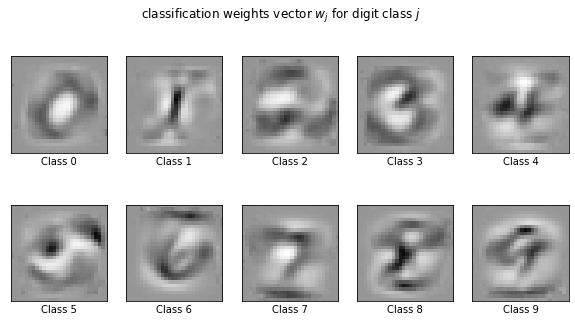

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

### Exercises: ###  
<ul>
<li> The snippet above invoked the "sag" solver which only deals with $L2$ regularization. Try another solver, e.g. 'liblinear', in scikit that supports $L1$ regularization. You can find more details on <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.</a>
<li> Visualize the misclassified samples. Analyze on how logistic regression performs on MNIST, and note this since we will study the MNIST problem later on using deep neural nets.

<li> Try to vary the size of the training set and see how that affects the accuracy.
<li>  [Theory] In this notebook, we considered a $K=10$ multi-class logistic regression (MLR) also known as the SoftMax regression. Recall that the our model reads:
$$
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}}
$$
Use this to construct the likelihood function $P(y|\boldsymbol{x})$.

<li> [Theory] Now consider we're given a set of i.i.d. data $\mathcal{D}=\{(\boldsymbol{x}_1,y_1),\cdots, (\boldsymbol{x}_n,y_n)\}$. As we argued in the main text, the cross-entropy error used in logistic regression is motivated by maximizing the likelihood (or equivalently, minimizing the negative log-likelihood), find the corresponding error function $E(\boldsymbol{w}_0,\cdots,\boldsymbol{w}_9)$ in MLR using the hypothesis above. 

<li> [Theory] Using the error function derived above, calculate its gradient $\frac{\partial E}{\partial \boldsymbol{w}_k}$. Can you find an elegant way of writing the gradient?
</ul>


Theory: (1) By taking the product over all datapoints and also over all categories (of which there are ten) following eq 80 from the guide, we can get the likelihood function. (2) We can then get the error function by taking the logarithm to convert all the products to sums, as in eq 81 from the guide.

##### Exercise (1): Use saga solver and L1 regularization (liblinear does not allow multinomial/softmax)

In [12]:
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Example run in 50.674 s
Sparsity with L1 penalty: 8.67%
Test score with L1 penalty: 0.8869


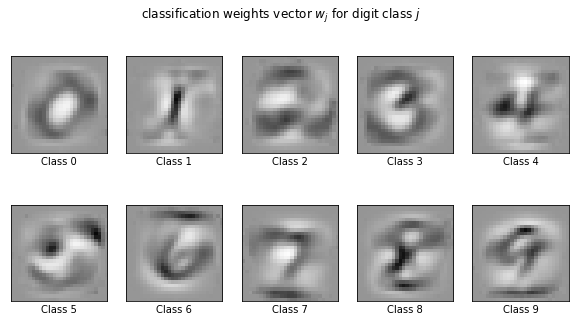

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

We don't seem to get any better using L1 regularization with the saga solver as opposed to L2 with sag. 

##### Exercise 2: visualize the misclassified samples

2
10
42
46
49
58
59
65
77


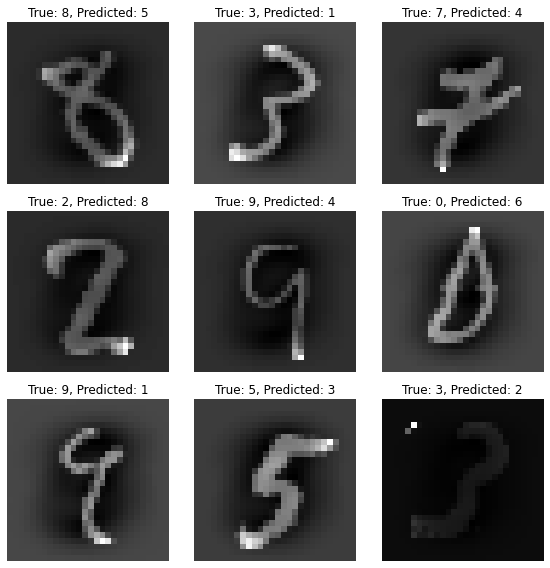

In [31]:
y_pred = clf.predict(X_test)

# Find the misclassified samples
misclassified_idx = np.where(y_pred != y_test)[0]

# Plot the misclassified samples
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    if i < misclassified_idx.shape[0]:
        idx = misclassified_idx[i]
        print(idx)
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test.values[idx]}, Predicted: {y_pred[idx]}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

Some of these seem like we should very much be able to classify them, and an accuracy of ~89% isn't great. Logistic Regression doesn't seem to be ideal for classifying MNIST data. As we see later, using a neural network is much better. 

##### Exercise (3): vary the size of the training set:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) ## more training data
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 407.074 s
Sparsity with L2 penalty: 8.67%
Test score with L2 penalty: 0.8996


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) ## less training data
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 416.175 s
Sparsity with L2 penalty: 9.06%
Test score with L2 penalty: 0.8994


By increasing or decreasing the amount of training data, it doesn't seem like we do any better. 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.999, random_state=42) ## less training data
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 513.357 s
Sparsity with L2 penalty: 36.99%
Test score with L2 penalty: 0.5822


Of course by severly limiting the traning data, we can tank the accuracy.